# Assignment 11 - Use multiple regression with the MPG data  
## Author: Jonathan Heard
## Class: CIS256DA

## The data file for this project is available from the Seaborn website. 
##  To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg').

Tasks

 1. The data file for this project is available from the Seaborn website. 
       To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg')(2 pts.).
 2. Display the first five rows of data (2 pts.).
 3. Use the info() method to display the data types for the columns (2 pts.).
 4. Get the brand from the name column and store it in a new column named brand.
       Hint: To do that, you can use the apply() method with a lambda expression (2 pts.).
 5. Drop the name column, and then display the first five rows of data (3 pts.).
 6. Display all of the unique values in the brand column (2 pts.).
 7. Review the brand data, and then fix the spelling errors in the brand column (2 pts.).
 8. Drop all rows from the DataFrame that have missing values (2 pts.).
 9. Get the two categorical columns (the one with the object data type), and store them in a list.
       Then, convert those columns to dummy variables, and store the results in a new DataFrame (3 pts.).
10. Drop the categorical columns from the original DataFrame, and join the DataFrame with the dummy variables to it.
       Store the result in a DataFrame named dataDummies, and then use the info() method to display the resulting columns (4 pts.).
11. Rescale the data in the numeric columns, and then display the rescaled data (4 pts.).
12. Display the correlation data for the mpg column (2 pts.).
13. Split the data into test and training datasets. The test dataset should consist of 20% of the total dataset,
       and you should specify a value for the random_state parameter. Note that there aren’t any non-numeric columns to drop (3 pts.).
14. Use a for loop with the feature selection model to test different numbers of features. 
       Be sure not to include the price column in the list of independent variables. 
       Note that it may take a few minutes for this code to run (10 pts.).
15. Plot the test and training scores with a line plot based on the number of features (5 pts.).

After completing the assignment, please submit your .ipynb file.


## Import all required modules

In [1]:
# Import pandas and assign the alias pd
import pandas as pd

# Import Seaborn and assign the alias sns
import seaborn as sns

# Import the Scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import additional SciKit-learn class
from sklearn.preprocessing import StandardScaler

# Import additional SciKit-learn classes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Tasks list

In [2]:
# Task 01 - The data file for this project is available from the Seaborn website. 
#           To load this data into a DataFrame, run this code: mpg = sns.load_dataset('mpg').

mpg = sns.load_dataset('mpg')


In [3]:
# Task 02 - Display the first five rows of data.

mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Task 03 - Use the info() method to display the data types for the columns.

# Nice to have a quick look at the total of the data, also how big a file it really is.

mpg.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 74.0 KB


In [5]:
# Task 04 - Get the brand from the name column and store it in a new column named brand.
#             Hint: To do that, you can use the apply() method with a lambda expression.

#  When I first tried to split the name column, I kept getting errors that I couldn't split
#    an int data type. I proved to myself, that for some odd reason the name column, even though identifed
#    as an object data type, it was responding as an int data type. When I made a copy of the
#    the name column, I was able to then do the necessary splitting. Just for grins I proved to myself
#    that I could also make a model column. I will drop make, name and model in the next Task
#    as requested.

mpg['make'] = mpg.name

mpg['brand'] = mpg.apply(lambda x: x.make.split()[0], axis = 1)

mpg['model'] = mpg.apply(lambda x: ' '.join(x.make.split()[1:99]), axis = 1)

mpg.info()

mpg.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   make          398 non-null    object 
 10  brand         398 non-null    object 
 11  model         398 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 37.4+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,brand,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford torino,ford,torino


In [6]:
# Task 05 - Drop the name column, and then display the first five rows of data.

#  I also dropped the make and model columns, as I mentioned in the long comment in Task 04.

mpg.drop(columns = ['name', 'make', 'model'], inplace = True)

mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


In [7]:
# Task 06 - Display all of the unique values in the brand column.

mpg.brand.value_counts()


ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: brand, dtype: int64

In [8]:
# Task 07 - Review the brand data, and then fix the spelling errors in the brand column.

rename_dict = {'vw':'volkswagen', 'chevy':'chevrolet', 'maxda':'mazda', 'vokswagen':'volkswagen',
              'chevroelt':'chevrolet', 'toyouta':'toyota', 'nissan':'datsun', 'mercedes':'mercedes-benz'}

mpg.brand.replace(rename_dict, inplace = True)

# Re-display all the unique values in the brand column, to ensure the brand data has all the 
#    spelling errors removed. Revise the rename_dict for any missed spelling errors and then
#    rerun this cell.

mpg.brand.value_counts()


ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           24
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
subaru            4
opel              4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
hi                1
capri             1
triumph           1
Name: brand, dtype: int64

In [9]:
# Task 08 - Drop all rows from the DataFrame that have missing values.

# This was used to see the 6 rows to be deleted, then commented out.


    
mpg = mpg.dropna()

mpg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   brand         392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [10]:
# Task 09 - Get the two categorical columns (the one with the object data type), and store them in a list.
#             Then, convert those columns to dummy variables, and store the results in a new DataFrame.

catColumns = ['origin', 'brand']

dummyCats = pd.get_dummies(mpg[catColumns])


In [11]:
# Task 10 - Drop the categorical columns from the original DataFrame, and join the DataFrame with the dummy variables to it.
#             Store the result in a DataFrame named dataDummies, 
#             and then use the info() method to display the resulting columns.

mpg = mpg.drop(columns = catColumns)

dataDummies = dummyCats.join(mpg)

dataDummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin_europe        392 non-null    uint8  
 1   origin_japan         392 non-null    uint8  
 2   origin_usa           392 non-null    uint8  
 3   brand_amc            392 non-null    uint8  
 4   brand_audi           392 non-null    uint8  
 5   brand_bmw            392 non-null    uint8  
 6   brand_buick          392 non-null    uint8  
 7   brand_cadillac       392 non-null    uint8  
 8   brand_capri          392 non-null    uint8  
 9   brand_chevrolet      392 non-null    uint8  
 10  brand_chrysler       392 non-null    uint8  
 11  brand_datsun         392 non-null    uint8  
 12  brand_dodge          392 non-null    uint8  
 13  brand_fiat           392 non-null    uint8  
 14  brand_ford           392 non-null    uint8  
 15  brand_hi             392 non-null    uin

In [12]:
# Task 11 - Rescale the data in the numeric columns, and then display the rescaled data.

#         Note: I did not rescale the mpg column as it was the dependent variable column .

numCols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

scaler = StandardScaler()

dataDummies[numCols] = scaler.fit_transform(dataDummies[numCols])

dataDummies.head()


,origin_europe,origin_japan,origin_usa,brand_amc,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_capri,brand_chevrolet,...,brand_triumph,brand_volkswagen,brand_volvo,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [13]:
# Task 12 - Display the correlation data for the mpg column.

dataDummies.corr()[['mpg']].sort_values(by = 'mpg', ascending = False)


,mpg
mpg,1.000000
model_year,0.580541
origin_japan,0.451454
acceleration,0.423329
brand_volkswagen,0.262610
brand_datsun,0.257857
brand_honda,0.245092
origin_europe,0.244313
brand_toyota,0.161369
brand_mazda,0.150744


In [14]:
# Task 13 - Split the data into test and training datasets. The test dataset should consist of 20% of the total dataset,
#             and you should specify a value for the random_state parameter.
#             Note that there aren’t any non-numeric columns to drop.

mpgTrain, mpgTest = train_test_split(dataDummies, test_size = 0.20, random_state = 42)


In [15]:
# Task 14 - Use a for loop with the feature selection model to test different numbers of features. 
#             Be sure not to include the mpg column in the list of independent variables. 
#             Note that it may take a few minutes for this code to run.

model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(mpgTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(mpgTrain.drop(columns=['mpg']), mpgTrain['mpg'])

    x_train_fs = fs.transform(mpgTrain.drop(columns=['mpg']))
    x_test_fs = fs.transform(mpgTest.drop(columns=['mpg']))

    model.fit(x_train_fs, mpgTrain['mpg'])
    
    testScore = model.score(x_test_fs, mpgTest['mpg'])
    trainScore = model.score(x_train_fs, mpgTrain['mpg'])
    
    testScores.append(testScore)
    trainScores.append(trainScore)


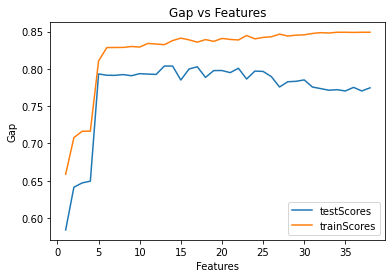

In [16]:
# Task 15 - Plot the test and training scores with a line plot based on the number of features. 

df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'Features'}, inplace=True)
df.Features = df.Features + 1
df.plot(x='Features', y=['testScores','trainScores'], ylabel = 'Gap', title = 'Gap vs Features');


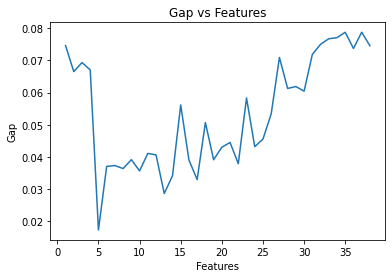

In [17]:
# As shown in the example notebook, here is a line plot of the gap
#   between the trainScores and the testScores.

# Based on this and the line plot above,the first 5 features are all that 
#   is needed to do the regression.

df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='Features', y=['gap'], title = 'Gap vs Features', ylabel = 'Gap', legend = False);


In [18]:
# Just to see what the data behind the line plot above looks like.

df.head(6)

,Features,testScores,trainScores,gap
0,1,0.584106,0.658663,0.074557
1,2,0.641312,0.707804,0.066491
2,3,0.647067,0.716347,0.069280
3,4,0.649457,0.716470,0.067013
4,5,0.793165,0.810544,0.017380
5,6,0.791384,0.828456,0.037072
